# Deutsch Jozsa Algorithm
It is similar to Deutsch algorithm but here the algorithm is supposed to work even if input contains n qubits.
<br><br>
Before going further, need to understand Hadamard (computational basis)

## Hadamard Gate

$$
\begin{equation*}
\begin{aligned}

\ket{H|x} &= \frac{1}{\sqrt{2}} \left[ (-1)^{x.y} \ket{0} + (-1)^{x.y} \ket{1} \right] \\

\ket{H|x} &=
\begin{cases}
\frac{1}{\sqrt{2}} \left[ \ket{0} + \ket{1} \right], & x = \ket{0} \\
\frac{1}{\sqrt{2}} \left[ \ket{0} - \ket{1} \right], & x = \ket{1}
\end{cases} \\

\ket{H|x} &= \frac{1}{\sqrt{2}} \sum_{y \epsilon\{0, 1\}} (-1)^{x.y} \ket{y} \\

\textbf{To generalise the Hadamard for n values: } \\

\ket{H^{\otimes n}|x^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y} \ket{y} \\

\textbf{Assume that the state x is n times 0 state: } \\

\ket{H^{\otimes n}|0^{\otimes n}} &= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{0.y} \ket{y} \\
&= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^0 \ket{y} \\
&= \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} \ket{y} \\

\end{aligned}
\end{equation*}
$$

## Deutsch Jozsa

Assume we have n qubits in $\ket{0}^{\otimes n}$ and last qubit in state $\ket{-}$

$$
\begin{equation*}
\begin{aligned}

\ket{\Psi_0} &= \ket{0}^{\otimes n} \ket{-} \\

\textbf{Apply } H^{\otimes n} \textbf{ to all } \ket{0}^{\otimes n} \\

\ket{\Psi_1} &= H^{\otimes n} \ket{0}^{\otimes n} \ket{-} \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} \ket{x} \ket{-} \\

\textbf{Apply } U_f \textbf{ oracle} \\

\ket{\Psi_2} &= U_f \otimes \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} \ket{x} \ket{-} \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} U_f \ket{x} \ket{-} \\

\textbf{*Phase oracle} \\
U_f\ket{x} \ket{-} &= (-1)^{f(x)} \ket{x} \ket{-} \\[6pt]

\textbf{Hence: } \\
\ket{\Psi_2} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \ket{x} \ket{-} \\

&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \ket{x} \\

\textbf{Apply } H^{\otimes n} \textbf{ to all } \ket{x} \\
\ket{\Psi_3} &= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \left[ H^{\otimes n} \ket{x} \right] \\
&= \frac{1}{\sqrt{2^n}} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \left[ \frac{1}{\sqrt{2^n}} \sum_{y \epsilon\{0, 1\}^n} (-1)^{x.y} \ket{y} \right] \\
&= \sum_{y \epsilon\{0, 1\}^n}  \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \times (-1)^{x.y} \right] \ket{y} \\
&= \sum_{y \epsilon\{0, 1\}^n}  \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x) - x.y} \right] \ket{y} \\

\textbf{Just consider the amplitude for all 0 states} \\
\Phi_0 &= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x) - x.0} \right] \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{f(x)} \right] \\

\textbf{For Constant f(x)=0} \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1)^{0} \right] \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} 1 \right] \\
&= \left[ \frac{1}{2^n} \times 2^n \right] = 1 \\

\textbf{For Constant f(x)=1} \\
&= \left[ \frac{1}{2^n} \sum_{x \epsilon\{0, 1\}^n} (-1) \right] \\
&= \left[ \frac{1}{2^n} \times 2^n (-1) \right] = -1 \\

\end{aligned}
\end{equation*}
$$

**For balanced f(x), half will be +1 and half will be -1, hence amplitude is 0**


In [86]:
from qiskit import QuantumCircuit, transpile, QuantumRegister, ClassicalRegister
from qiskit_aer import Aer, AerSimulator
from qiskit_ibm_runtime.fake_provider import FakeManilaV2
from qiskit.visualization import plot_histogram
from IPython.display import display

import numpy as np

In [80]:
def const_0(qr_count):
    qr = QuantumRegister(qr_count, 'q')
    qc = QuantumCircuit(qr)
    return qc

def const_1(qr_count):
    qr = QuantumRegister(qr_count, 'q')
    qc = QuantumCircuit(qr)
    for qubit in qr[:-1]:
        qc.x(qubit)
    return qc

In [96]:
import random
def create_random_balanced_oracle(n_qubits):
    """
    Creates a random balanced Deutsch-Jozsa oracle for n input qubits,
    returning just the QuantumCircuit object with gates applied directly.

    Args:
        n_qubits (int): The number of input qubits (n >= 1). 
                        The circuit will have n input qubits + 1 ancilla qubit.

    Returns:
        QuantumCircuit: A quantum circuit representing a balanced oracle.
    """
    # The full circuit needs n input qubits and 1 ancilla qubit
    qr = QuantumRegister(n_qubits + 1, 'q')
    oracle_circuit = QuantumCircuit(qr)
    
    # The ancilla qubit is the last one (index n_qubits)
    ancilla_qubit_index = n_qubits

    # 1. Choose a random non-zero 'secret' bitstring (s) of length n
    s = [random.randint(0, 1) for _ in range(n_qubits)]
    
    # Ensure the string is non-zero
    while all(bit == 0 for bit in s):
        s = [random.randint(0, 1) for _ in range(n_qubits)]
    
    print(f"Random secret bitstring 's' generated: {s}")

    # 2. Implement the oracle Uf directly within the circuit
    # Apply CX gates where the control is the input qubit i, 
    # and the target is the ancilla qubit, if the s[i] bit is 1.
    for i, bit in enumerate(s):
        if bit == 1:
            oracle_circuit.cx(qr[i], qr[ancilla_qubit_index])


    return oracle_circuit

In [89]:
def deutsch_jozsa(oracle, qr_count):
    qr = QuantumRegister(qr_count, 'q')
    cr = ClassicalRegister(qr_count, 'c')
    qc = QuantumCircuit(qr, cr)

    qc.x(qr[-1])
    
    for qubit in qr:
        qc.h(qubit)

    qc.barrier()

    blackbox = oracle.to_gate()
    blackbox.label = "$U_f$"
    qc = qc.compose(blackbox)

    qc.barrier()

    for qubit in qr[:-1]:
        qc.h(qubit)

    qc.measure(qr[:-1], cr[:-1])

    return qc


Random secret bitstring 's' generated: [0, 1, 1, 0]
constant_0: {'0000': 100}


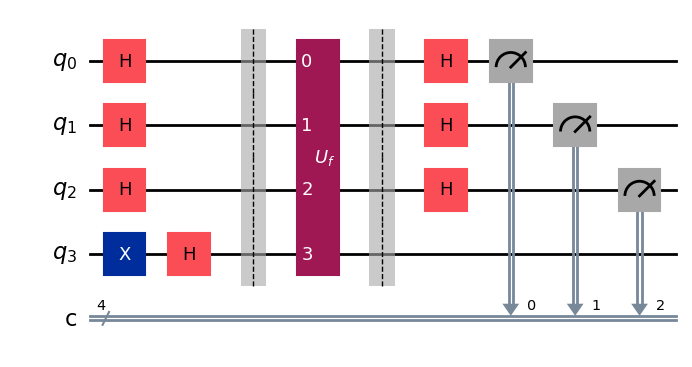

constant_1: {'0000': 100}


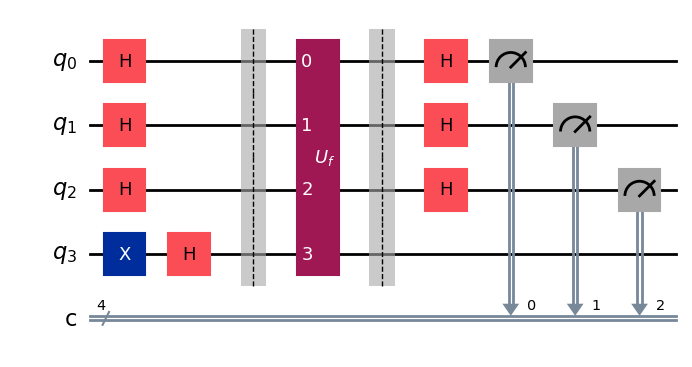

CircuitError: 'The amount of qubit(4)/clbit(0) arguments does not match the gate expectation (5).'

In [97]:
qubit_count = 4
# Test all oracles
oracles = {
    'constant_0': const_0(qubit_count),
    'constant_1': const_1(qubit_count),
    'random_1': create_random_balanced_oracle(qubit_count)
}

backend = AerSimulator()

for name, oracle in oracles.items():
    circuit = deutsch_jozsa(oracle, qubit_count)

    compiled_qc = transpile(circuit, backend)

    results = backend.run(compiled_qc, shots=100).result()
    counts = results.get_counts()

    print(f"{name}: {counts}")

    display(circuit.draw('mpl'))